<a href="https://colab.research.google.com/github/MANOJHRMANOJHR/ai_assignments/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== Decision Tree (gini) =====
Accuracy: 0.9777777777777777
Feature Importances: [0.         0.         0.55087719 0.44912281]


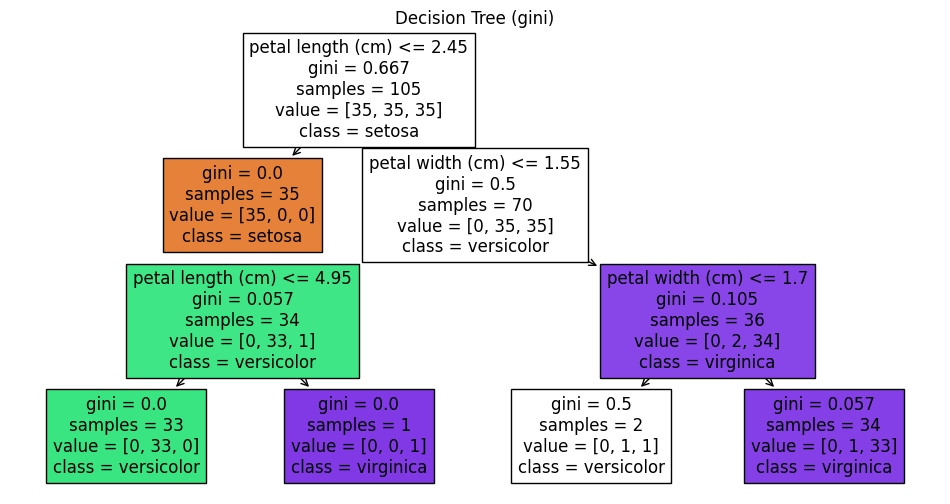


===== Decision Tree (entropy) =====
Accuracy: 0.9333333333333333
Feature Importances: [0.02909594 0.         0.64358941 0.32731465]


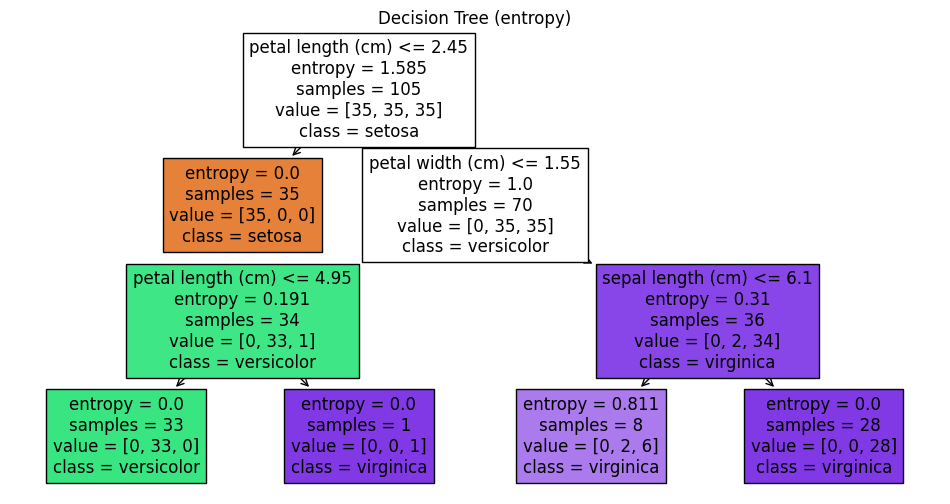

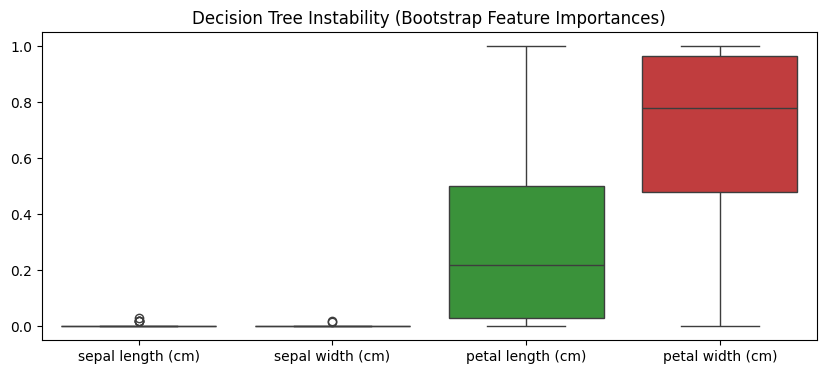

In [2]:
# -----------------------------------------------
# DECISION TREE CLASSIFIER: GINI vs ENTROPY
# Feature Importances + Instability via Bootstrap
# -----------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Different criteria + hyperparameters
criteria = ["gini", "entropy"]

for crit in criteria:
    print(f"\n===== Decision Tree ({crit}) =====")

    dt = DecisionTreeClassifier(
        criterion=crit,
        max_depth=3,
        min_samples_split=4,
        random_state=42
    )

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_proba = dt.predict_proba(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Feature Importances:", dt.feature_importances_)

    # Plot the tree
    plt.figure(figsize=(12, 6))
    plot_tree(
        dt,
        feature_names=feature_names,
        class_names=data.target_names,
        filled=True
    )
    plt.title(f"Decision Tree ({crit})")
    plt.show()

# ---------------------------------------------------------------
# INSTABILITY DEMONSTRATION: Bootstrap different samples & plot results
# ---------------------------------------------------------------

n_bootstraps = 30
importances = []

for i in range(n_bootstraps):
    # Bootstrap sampling
    idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_b, y_b = X_train[idx], y_train[idx]

    # Fit a shallow tree to exaggerate instability
    dt_bs = DecisionTreeClassifier(max_depth=3)
    dt_bs.fit(X_b, y_b)

    importances.append(dt_bs.feature_importances_)

importances = np.array(importances)

# Plot variance of feature importances
plt.figure(figsize=(10, 4))
sns.boxplot(data=importances)
plt.xticks(ticks=range(len(feature_names)), labels=feature_names)
plt.title("Decision Tree Instability (Bootstrap Feature Importances)")
plt.show()
